In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

In [3]:
pole_names = [
    ("Care", "Harm"),
    ("Fairness", "Cheating"),
    ("Loyalty", "Betrayal"),
    ("Authority", "Subversion"),
    ("Sanctity", "Degredation"),
]
columns = [pole[0] for pole in pole_names]
center_df = pd.read_csv("new_cluster/custom_files/dimensions/center.csv", skiprows=2, header=None, names=columns)
center_left_df = pd.read_csv(
    "new_cluster/custom_files/dimensions/center-left.csv", skiprows=2, header=None, names=columns
)
right_df = pd.read_csv("new_cluster/custom_files/dimensions/right.csv", skiprows=2, header=None, names=columns)

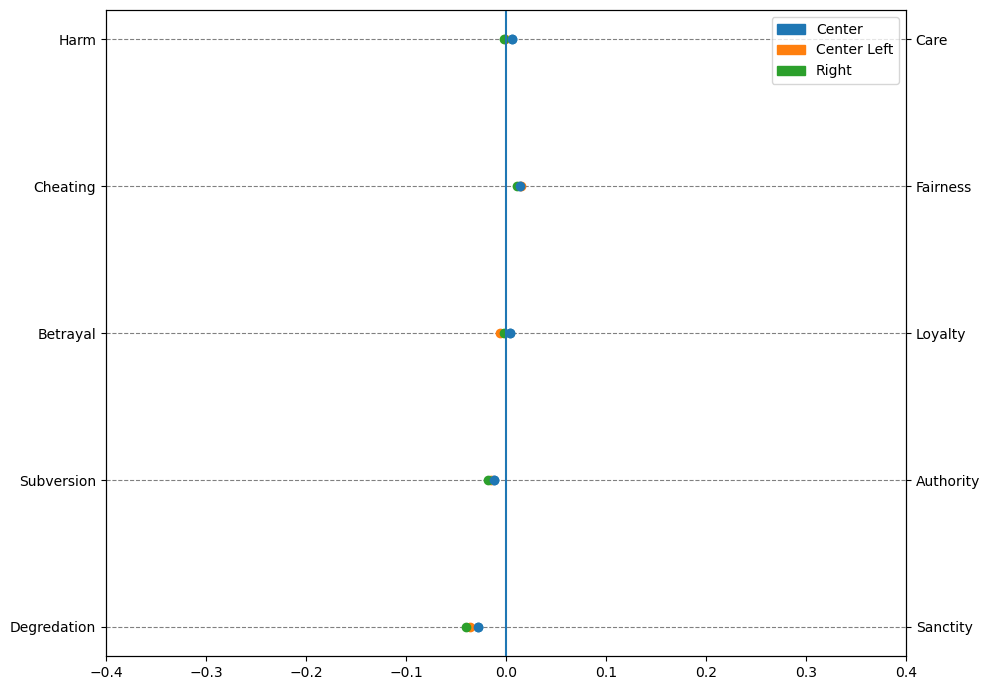

In [12]:
def visualize_means(dfs, titles):
    labels_right, labels_left = zip(*pole_names)
    means = [df.mean() for df in dfs]
    colors = list(mcolors.TABLEAU_COLORS) + list(mcolors.BASE_COLORS) + list(mcolors.CSS4_COLORS)

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    plt.axvline(0)
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(color="gray", linestyle="dashed")
    plt.xlim(-0.1, 0.1)
    plt.xlim(-0.4, 0.4)
    ax2.scatter(x=means[0], y=labels_right)  # only needed for labels on the right
    legend_entries = []
    for i in range(0, len(dfs)):
        legend_entries.append(mpatches.Patch(color=colors[i], label=titles[i]))
        ax1.scatter(x=means[i], y=labels_left)

    ax1.invert_yaxis()
    ax2.invert_yaxis()
    plt.gcf().set_size_inches(10, 7)
    plt.tight_layout()
    plt.legend(handles=legend_entries)
    plt.show()


visualize_means(
    [center_df, center_left_df, right_df],
    ["Center", "Center Left", "Right"],
)

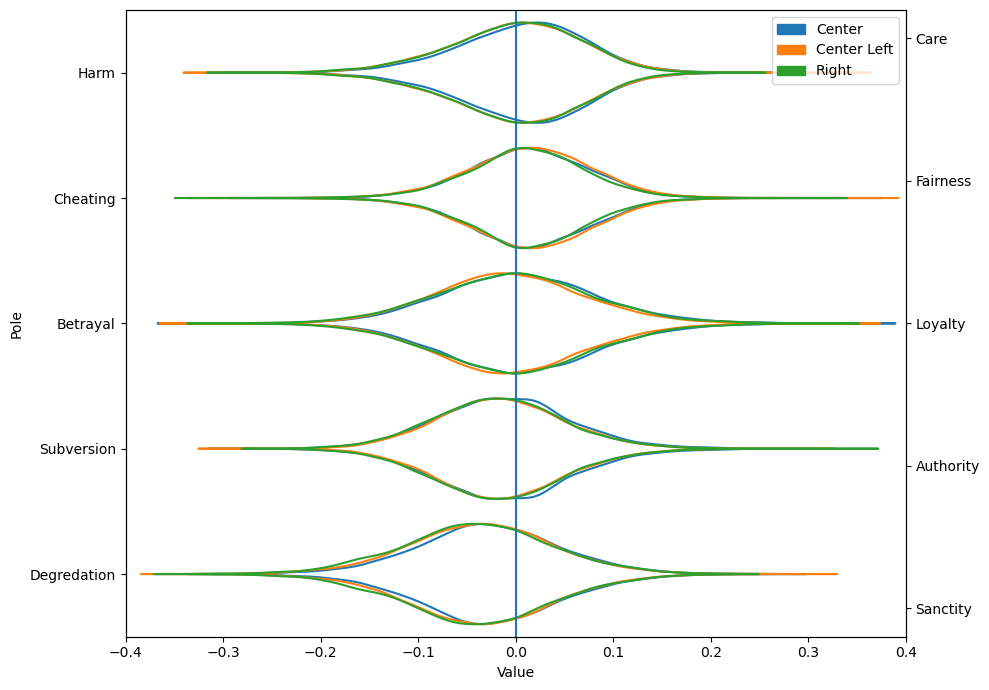

In [24]:
def visualize_means(dfs, titles):
    means = [df.mean() for df in dfs]
    labels_right, labels_left = zip(*pole_names)
    colors = list(mcolors.TABLEAU_COLORS) + list(mcolors.BASE_COLORS) + list(mcolors.CSS4_COLORS)

    melted_dfs = []
    for df in dfs:
        # combine the columns
        # add a column for the pole name
        melted_dfs.append(df.melt(var_name="Pole", value_name="Value"))

    # create one subplot for each pole
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    plt.axvline(0)
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(color="gray", linestyle="dashed")
    ax2.scatter(x=means[0], y=labels_right, c="white")  # invisible scatter for labels on the right
    plt.xlim(-0.1, 0.1)
    plt.xlim(-0.4, 0.4)
    legend_entries = []
    for i in range(len(dfs)):
        df = melted_dfs[i]
        legend_entries.append(mpatches.Patch(color=colors[i], label=titles[i]))
        sns.violinplot(data=df, x="Value", y="Pole", ax=ax1, fill=False, inner=None, density_norm="width")

    # ax1.invert_yaxis()
    ax2.invert_yaxis()
    plt.gcf().set_size_inches(10, 7)
    plt.tight_layout()
    plt.legend(handles=legend_entries, loc="upper right")
    plt.show()


visualize_means([center_df, center_left_df, right_df], ["Center", "Center Left", "Right"])